In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("invest.txt",sep=' ')

In [83]:
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [84]:
df["gnp"]=df["gnp"].apply(lambda x : np.log(x))
df["invest"] = df["invest"].apply(lambda x : np.log(x))

In [85]:
df

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50
5,1973,7.190224,5.437209,105.75,6.44
6,1974,7.268362,5.432411,115.08,7.83
7,1975,7.345494,5.328361,125.79,6.25
8,1976,7.448916,5.552572,132.34,5.50
9,1977,7.559195,5.781052,140.05,5.46


<Axes: xlabel='gnp'>

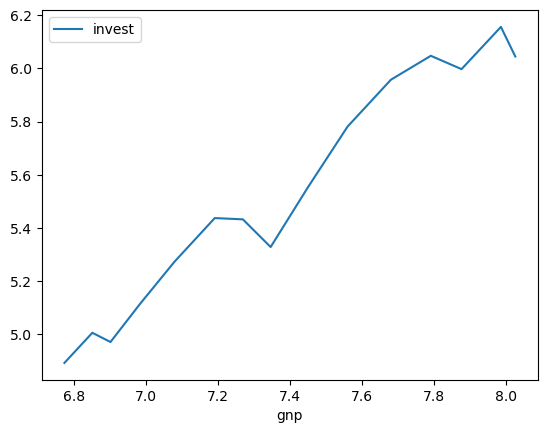

In [86]:
# Plotting the line
df.plot(x="gnp", y="invest",kind = "line")




In [87]:
x_bar = df["gnp"].mean()
y_bar = df["invest"].mean()
beta_gnp = (np.sum((np.array(df["gnp"])-x_bar)*(np.array(df["invest"])-y_bar)))/sum((np.array(df["gnp"])-x_bar)**2)
intercept = y_bar - beta_gnp*x_bar
print("slope:",beta_gnp)
print("intercept:",intercept)

slope: 1.015281401598871
intercept: -1.9635913352301815


In [88]:
def calculate_variances(X, y, beta0, beta1):
    n = len(y)
    residuals = y - (beta0 + beta1 * X)
    sigma_hat_squared = np.sum(residuals**2) / (n - 2)

    # Variance of beta0
    var_beta0 = sigma_hat_squared * (1/n + (X.mean()**2) / np.sum((X - X.mean())**2))

    # Variance of beta1
    var_beta1 = sigma_hat_squared / np.sum((X - X.mean())**2)

    return var_beta0, var_beta1, sigma_hat_squared
variance_0,variance_1 ,sigma = calculate_variances(df["gnp"],df["invest"],intercept,beta_gnp)
print("variance beta_0 :",variance_0)
print("variance beta_1 :",variance_1)

variance beta_0 : 0.1677289677260404
variance beta_1 : 0.003067283374269269


In [89]:
y_predicted  = intercept + beta_gnp*np.array(df["gnp"])
R2 = 1-((sum(np.array(df["invest"])-y_predicted)**2)/(sum(np.array(df["invest"])-y_bar)**2))
print("determination coefficent :", R2)

determination coefficent : 0.9506172839506173


In [91]:
import scipy.stats as stats
print("statistic of the test :" ,beta_gnp/np.sqrt(variance_1))
p_value = 2 * (1 - stats.t.cdf(np.abs(beta_gnp/np.sqrt(variance_1)),df.shape[0]-2))

print("p-value:",p_value)

statistic of the test : 18.331984456866678
p-value: 1.1363709973011282e-10


In [108]:
pred_1000 = intercept + beta_gnp*np.log(1000)
t_quantile = stats.t.ppf(1 - 0.9 / 2, df.shape[0])

confidence_interval_l = pred_1000 -t_quantile* np.sqrt(sigma)*np.sqrt((1/df.shape[0])+((np.log(1000) - x_bar)**2)/sum((np.array(df["gnp"])-x_bar)**2))
confidence_interval_h = pred_1000 + t_quantile*np.sqrt(sigma)*np.sqrt((1/df.shape[0])+((np.log(1000) - x_bar)**2)/sum((np.array(df["gnp"])-x_bar)**2))
pi_l = pred_1000 - t_quantile*np.sqrt(sigma)*np.sqrt(1+(1/df.shape[0])+((np.log(1000) - x_bar)**2)/sum((np.array(df["gnp"])-x_bar)**2))
pi_h = pred_1000 + t_quantile*np.sqrt(sigma)*np.sqrt(1+(1/df.shape[0])+((np.log(1000) - x_bar)**2)/sum((np.array(df["gnp"])-x_bar)**2))
print("confidence interval [{0},{1}]".format(np.exp(confidence_interval_l),np.exp(confidence_interval_h)))
print("prediction interval : [{0},{1}]".format(pi_l,pi_h))

confidence interval [155.28865084103566,156.6732778340938]
prediction interval : [5.037678846183443,5.061769406450161]


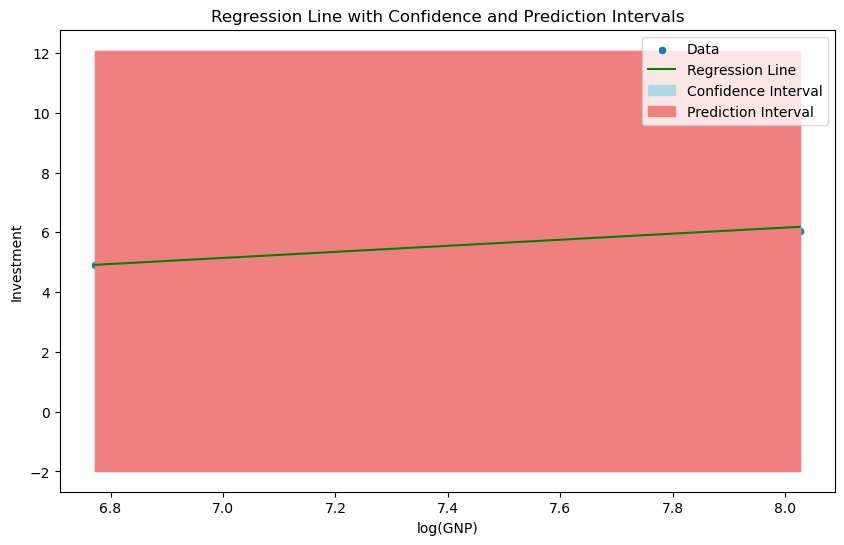

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["gnp"], y=df["invest"], label='Data')
plt.plot(df["gnp"],y_predicted, label='Regression Line', color='green')

# Confidence Interval
plt.fill_between(df["gnp"], confidence_interval_l, confidence_interval_h,
                 color='lightblue', label='Confidence Interval')

# Prediction Interval
plt.fill_between(df["gnp"],pi_l, pi_h,
                color='lightcoral', label='Prediction Interval')

plt.xlabel('log(GNP)')
plt.ylabel('Investment')
plt.title('Regression Line with Confidence and Prediction Intervals')
plt.legend()
plt.show()


In [105]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Using LinearRegression from sklearn
X = df[["gnp"]].values
y = df["invest"].values
model = LinearRegression()
model.fit(X, y)

# Intercept and slope from sklearn
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_[0]

print("\nIntercept (sklearn):", intercept_sklearn)
print("Slope (sklearn):", slope_sklearn)
print("difference : ",intercept - intercept_sklearn,"\n",slope_sklearn - beta_gnp)



Intercept (sklearn): -1.9635913352301815
Slope (sklearn): 1.015281401598871
difference :  0.0 
 0.0


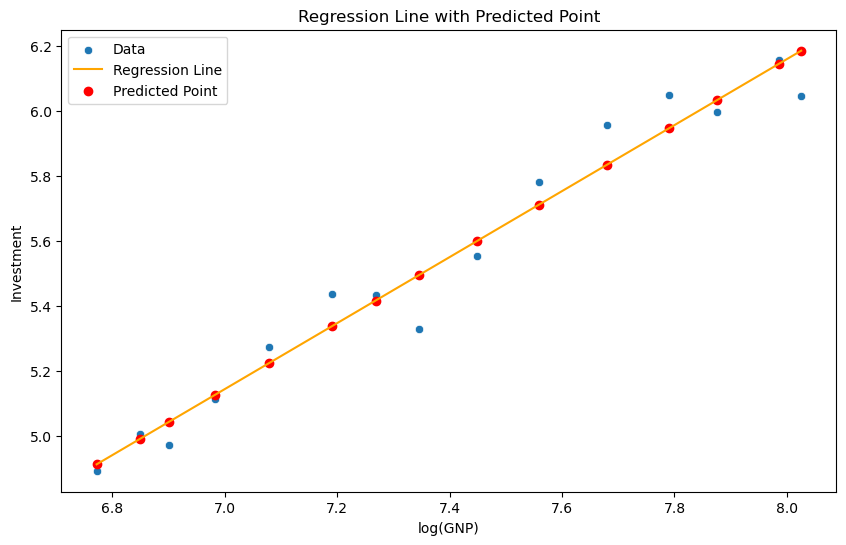

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["gnp"], y=df["invest"], label='Data')
plt.plot(df["gnp"], intercept_sklearn + slope_sklearn * df["gnp"], label='Regression Line', color='orange')
plt.scatter(df["gnp"], y_pred, color='red', marker='o', label='Predicted Point')

plt.xlabel('log(GNP)')
plt.ylabel('Investment')
plt.title('Regression Line with Predicted Point')

plt.legend()
plt.show()


In [ ]:
# Calculate the Gram matrix
gram_matrix = X.T @ X

# Check if the Gram matrix is of full rank
rank_gram_matrix = np.linalg.matrix_rank(gram_matrix)

print("Gram matrix:")
print(gram_matrix)
print("\nRank of the Gram matrix:", rank_gram_matrix)

if rank_gram_matrix == X.shape[1]:
    print("The Gram matrix is of full rank.")
else:
    print("The Gram matrix is not of full rank.")